[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/codeteme/img_clf_data_sprint_51/blob/main/scripts/main.ipynb)

In [2]:
!pip install kaggle

In [3]:
!chmod 600 ../kaggle/kaggle.json

In [4]:
!kaggle datasets download temesgentewolde/animal-dataset-intermediate -p ../data/raw

100%|███████████████████████████████████████▉| 216M/216M [02:02<00:00, 1.85MB/s]
100%|████████████████████████████████████████| 216M/216M [02:02<00:00, 1.85MB/s]


In [5]:
!unzip ../data/raw/animal-dataset-intermediate.zip -d ../data/raw

Archive:  ../data/raw/animal-dataset-intermediate.zip
  inflating: ../data/raw/animal_dataset_intermediate/Testing_set_animals.csv  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP--0Yr2a_yg2hs5QgCoHAOnAHaLJ.jpeg  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP--2DLJjX4d5SG0eF_EXsO9AHaEk.jpeg  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP--2ix__438O7A-yHzROPhGwHaFj.jpeg  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP-00qwuq8LDwY8bqltA0QfzwHaLF.jpeg  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP-01deWMs3t2fSlsMMrJhQawHaFs.jpeg  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP-02PCcubjRfmizjMlmiJQOQHaGS.jpeg  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP-03xXk3BG1koXi5RwOHQJUgHaFj.jpeg  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP-05T6sCe22QahSh0JKJW06QHaEm.jpeg  
  inflating: ../data/raw/animal_dataset_intermediate/test/OIP-0BjjCXTQdSG7WdJfYLdkCQAAAA.jpeg  
  i

In [6]:
!rm ../data/raw/animal-dataset-intermediate.zip

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pathlib
import os
import PIL
import PIL.Image

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data_dir = "../data/raw/animal_dataset_intermediate/train"
data_dir = pathlib.Path(data_dir)
print(data_dir)

../data/raw/animal_dataset_intermediate/train


In [9]:
num_skipped = 0
for folder_name in ("elefante", "farfalla", "mucca", "pecora", "scoiattolo"):
    folder_path = os.path.join(data_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')) + list(data_dir.glob('*/*.jpeg')))
print("Imported image_count: ", image_count)

Imported image_count:  8160


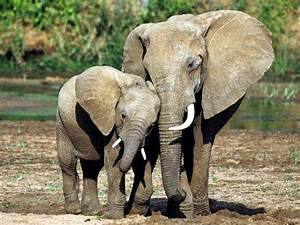

In [11]:
elephant = list(data_dir.glob('elefante/*'))
PIL.Image.open(str(elephant[0]))

In [12]:
batch_size = 32
img_height = 256
img_width = 256


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, # We train our model using 80% of the train_ds and test on the remaining 20%.
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8160 files belonging to 5 classes.
Using 6528 files for training.
Found 8160 files belonging to 5 classes.
Using 1632 files for validation.


Let's check if OS and PIL libraries are correctly reading and displying the images. 

In [13]:
class_names = ['elefante', 'farfalla', 'mucca', 'pecora', 'scoiattolo']

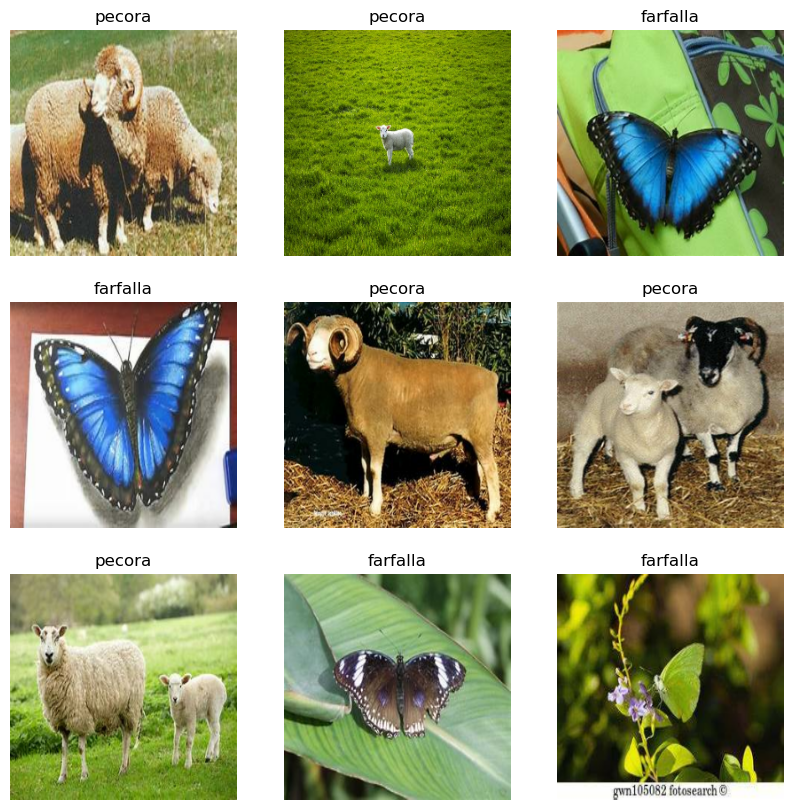

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()


In [15]:
# Get images(x) and lables(y) of a given batchdatasets
def get_image_label(ds): 
    x_train_ = []
    y_train_ = []
    for element in ds.as_numpy_iterator(): 
        x_train_.append(element[0])
        y_train_.append(element[1])
    x_train = np.concatenate(x_train_)
    y_train = np.concatenate(y_train_)
    
    return (x_train, y_train)

x_train, y_train = get_image_label(train_ds)
x_val, y_val = get_image_label(val_ds)

print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape, x_train.ndim)
print(x_val.shape, y_val.shape, x_val.ndim)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(6528, 256, 256, 3) (6528,) 4
(1632, 256, 256, 3) (1632,) 4


In [19]:
assert isinstance(x_train, (np.ndarray, np.generic))
assert isinstance(y_train, (np.ndarray, np.generic))
assert isinstance(x_val, (np.ndarray, np.generic))
assert isinstance(y_val, (np.ndarray, np.generic))

assert x_train.ndim, x_val == 4
assert y_train.ndim, y_train.ndim == 1

/Users/tmt0947/opt/anaconda3/envs/csx433env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 800x300 with 0 Axes>

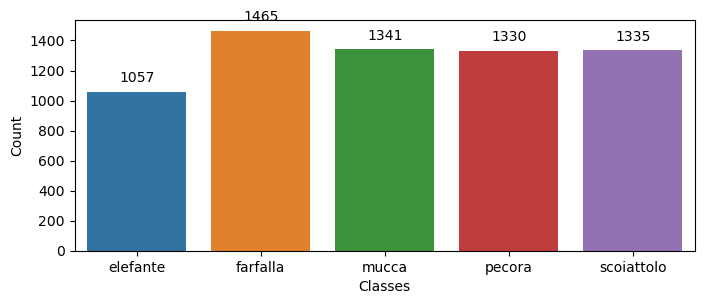

In [22]:
#TODO: Data viz to show data imbalance - bar graph

plt.figure(figsize=(8, 3))
splot = sns.countplot(y_train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(class_names)
splot.set_xlabel("Classes")
splot.set_ylabel("Count")
plt.show()

In [23]:
from sklearn.utils import resample 

print("-" * 70)
print('Input shape before resampling: ' ,x_train.shape, y_train.shape)

#..reshape (flatten) x_train for SMOTE resampling
nsamples, k, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,k*nx*ny))
x_train.shape

from imblearn.over_sampling import SMOTE
smote = SMOTE('all')
x_train, y_train = smote.fit_resample(x_train, y_train)

print("-" * 70)
print('Input shape after sampling: ' ,x_train.shape, y_train.shape)
print('Class distribution after over-sampling: ')
for i in range(len(class_names)):
    print(f'Number of class {class_names[i]} examples before:{x_train[y_train == i].shape[0]}')

----------------------------------------------------------------------
Input shape before resampling:  (6528, 256, 256, 3) (6528,)


/Users/tmt0947/opt/anaconda3/envs/csx433env/lib/python3.9/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=all as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


----------------------------------------------------------------------
Input shape after sampling:  (7325, 196608) (7325,)
Class distribution after over-sampling: 
Number of class elefante examples before:1465
Number of class farfalla examples before:1465
Number of class mucca examples before:1465
Number of class pecora examples before:1465
Number of class scoiattolo examples before:1465


/Users/tmt0947/opt/anaconda3/envs/csx433env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


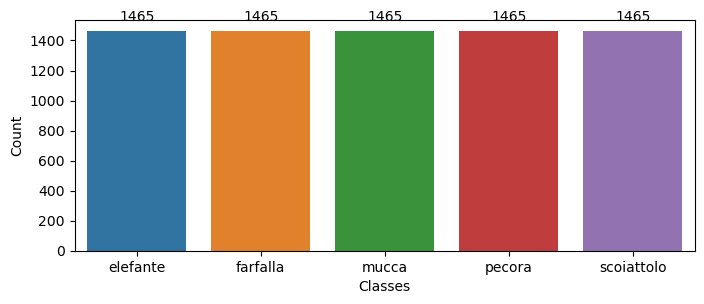

In [24]:
plt.figure(figsize=(8, 3))
splot = sns.countplot(y_train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(class_names)
splot.set_xlabel("Classes")
splot.set_ylabel("Count")
plt.show()

In [25]:
# return to original 4D shape
x_train = x_train.reshape(7325, k, nx, ny)


In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.RandomRotation(0.1),layers.RandomZoom(0.1),
    layers.RandomContrast((0.1, 0.9)),
    ])

assert(x_train.ndim == 4) # Check if augementation affected shape

In [28]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [29]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [30]:
num_classes = 5

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  layers.Dropout(0.2), # Dropout https://www.tensorflow.org/tutorials/images/classification#dropout
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [31]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
  )


# Two callbacks options to implement early Stopping to avoid overfitting. 

#1. keras.callbacks.ModelCheckpoint() saves the model when its performance on the validation set is the best so far

#2. keras.callbacks.EarlyStopping() interrupts training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model.

It's possible to  combine both callbacks to save checkpoints of your model (in case the computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources)

In [33]:
# epochs = 50
# checkpoint_cb = keras.callbacks.ModelCheckpoint("saved_model/keras_model.h5", save_best_only=True)
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
#                                                   restore_best_weights=True)
# history =  model.fit(
#   x_train, y_train,
#   validation_data=(x_val, y_val),
#   epochs=epochs,
#   callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
# )


checkpoint_cb saves the best model. Just in case, though, we'll also save the final model

In [77]:
# model.save('../saved_model/best_model') 

INFO:tensorflow:Assets written to: ../saved_model/best_model/assets


In [68]:
# model.evaluate(x_val, y_val, verbose=2) # ~78% accuracy

51/51 - 14s - loss: 1.6208 - accuracy: 0.2016


[1.6207958459854126, 0.20159313082695007]

In [34]:
new_model = tf.keras.models.load_model('../my_keras_model.h5')
new_model.evaluate(x_val, y_val, verbose=2) # ~78% accuracy


51/51 - 11s - loss: 0.5761 - accuracy: 0.7819


[0.5761368274688721, 0.781862735748291]

In [ ]:
# TODO: Calculate validation accuracy per class. 


In [21]:
import pandas as pd

pd.options.display.max_colwidth = 999

../data/raw/animal_dataset_intermediate/test
Imported image_count:  896


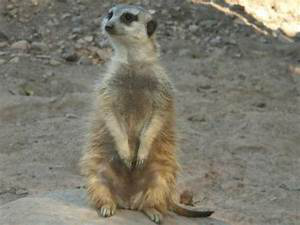

In [22]:
test_data_dir = "../data/raw/animal_dataset_intermediate/test"
test_data_dir = pathlib.Path(test_data_dir)
print(test_data_dir)

image_count = len(list(test_data_dir.glob('*.jpg')) + list(test_data_dir.glob('*.jpeg')))
print("Imported image_count: ", image_count)

picture = list(test_data_dir.glob('*'))
PIL.Image.open(str(picture[0]))

In [ ]:
df_submission_filename = pd.read_csv("../data/raw/animal_dataset_intermediate/Testing_set_animals.csv")

classes = []

df_len = df_submission_filename.shape[0]
for i in range(df_len): 
    path = os.path.join(test_data_dir, df_submission_filename.loc[i][0])
    img = tf.keras.utils.load_img(
        path, grayscale=False, color_mode='rgb', target_size=(img_height, img_width),
        interpolation='nearest'
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array.reshape(1, k, nx, ny)
    predict_img = model.predict(img_array) 
    classes_img = np.argmax(predict_img,axis=1)
    classes.append(classes_img[0])


In [ ]:
df_submission_filename['target'] = [class_names[num] for num in list(classes)]
df_submission_filename.head()

In [ ]:
# df_submission_filename.to_csv("submission/submission.csv", index=False)